<a href="https://colab.research.google.com/github/gilvardperez/Ciencia-de-datos/blob/main/Estandarizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artículo realizado por Gilvard Pérez

[LinkedIn](https://www.linkedin.com/in/gilvardperez)

La estandarización es un proceso común en estadística y análisis de datos que implica transformar los datos de tal manera que tengan una distribución con una media de 0 y una desviación estándar de 1. Este proceso es útil en diversas situaciones, especialmente cuando se trabaja con algoritmos de aprendizaje automático y estadísticos que asumen que los datos tienen una distribución normal o gaussiana.

La estandarización se realiza restando la media de los datos y luego dividiendo por la desviación estándar. Esta transformación hace que los datos estén centrados en 0 y que tengan una dispersión comparable entre ellos.

Matemáticamente, si XX representa una variable aleatoria, μμ representa la media de XX, y σσ representa la desviación estándar de XX, entonces la estandarización Xstd​ se calcula de la siguiente manera:


Donde:

    XstdXstd​ es el valor estandarizado.
    XX es el valor original.
    μμ es la media de los datos.
    σσ es la desviación estándar de los datos.

Después de la estandarización, la nueva distribución de los datos tiene una media de 0 y una desviación estándar de 1. Esto facilita la comparación y el análisis de los datos, así como la interpretación de los resultados.

La estandarización es especialmente útil en el contexto de algoritmos de aprendizaje automático, como regresión lineal, regresión logística, y máquinas de vectores de soporte (SVM), entre otros, donde ayuda a mejorar la convergencia del algoritmo y a evitar problemas relacionados con la escala de las variables.

In [4]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [5]:
# Cargando set de datos
boston = fetch_openml(data_id=531)
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


Generaremos un histograma de la variable "PTRATIO" para ver su distribución y crearemos la media y desviación estandard.

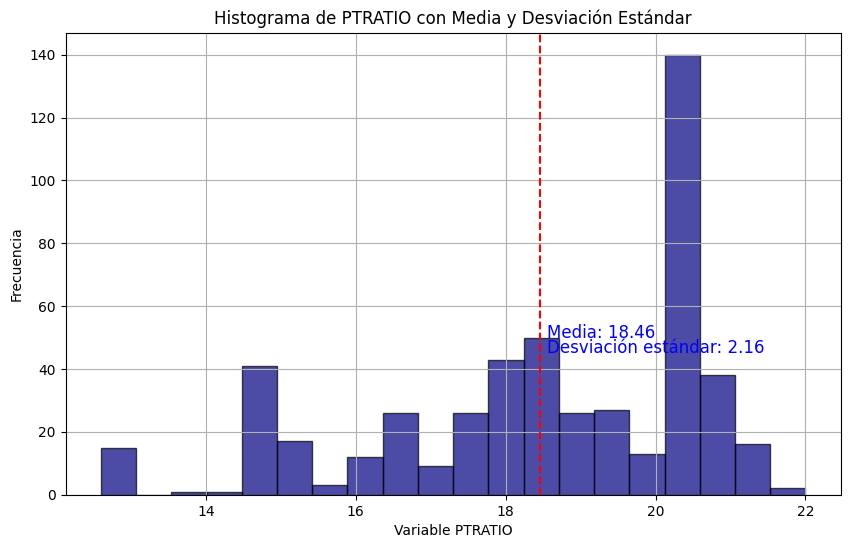

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df_boston['PTRATIO'], bins=20, color='navy', edgecolor='black', alpha=0.7)
mean_ptratio = df_boston['PTRATIO'].mean()
plt.axvline(mean_ptratio, color='red', linestyle='dashed', linewidth=1.5, label='Media')
plt.text(mean_ptratio + 0.1, 50, f'Media: {mean_ptratio:.2f}', color='blue', fontsize=12)
std_dev_ptratio = df_boston['PTRATIO'].std()
plt.text(mean_ptratio + 0.1, 45, f'Desviación estándar: {std_dev_ptratio:.2f}', color='blue', fontsize=12)
plt.xlabel('Variable PTRATIO')
plt.ylabel('Frecuencia')
plt.title('Histograma de PTRATIO con Media y Desviación Estándar')
plt.grid(True)
plt.show()

Iniciando proceso de estandarización

In [21]:
# Inicializar el StandardScaler
scaler = StandardScaler()

Creamos una columna nueva para poder hacer el comparativo

In [22]:
df_boston['PTRATIO_normalized'] = scaler.fit_transform(df_boston[['PTRATIO']])

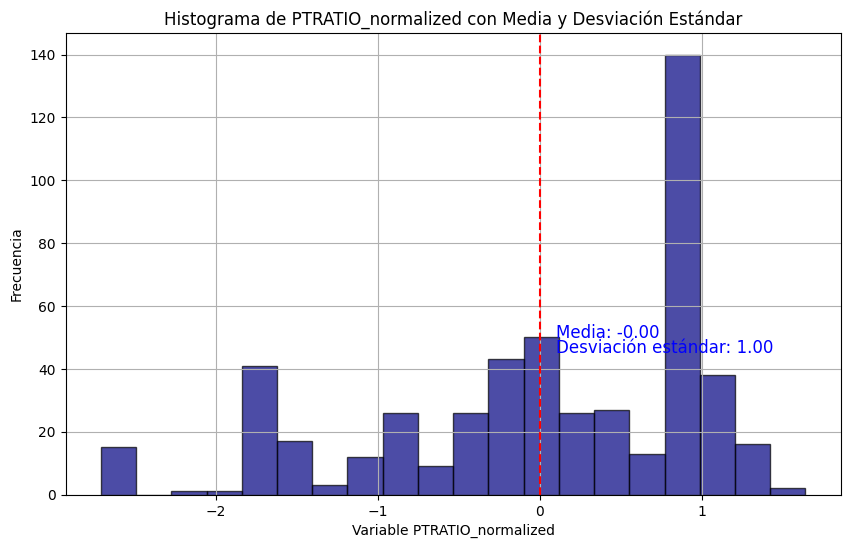

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df_boston['PTRATIO_normalized'], bins=20, color='navy', edgecolor='black', alpha=0.7)
mean_ptratio = df_boston['PTRATIO_normalized'].mean()
plt.axvline(mean_ptratio, color='red', linestyle='dashed', linewidth=1.5, label='Media')
plt.text(mean_ptratio + 0.1, 50, f'Media: {mean_ptratio:.2f}', color='blue', fontsize=12)
std_dev_ptratio = df_boston['PTRATIO_normalized'].std()
plt.text(mean_ptratio + 0.1, 45, f'Desviación estándar: {std_dev_ptratio:.2f}', color='blue', fontsize=12)
plt.xlabel('Variable PTRATIO_normalized')
plt.ylabel('Frecuencia')
plt.title('Histograma de PTRATIO_normalized con Media y Desviación Estándar')
plt.grid(True)
plt.show()

Posterior a haber realizado este ajuste podemos ver como la variable ahora tiene una media 0 y una desviación estándard 1

Vamos a generar un histograma de la variable sepal lenght a manera de conocer su distribución y veremos como esta luce posterior a normalizar

Veamos con un gráfico de subplos como se distribuyen

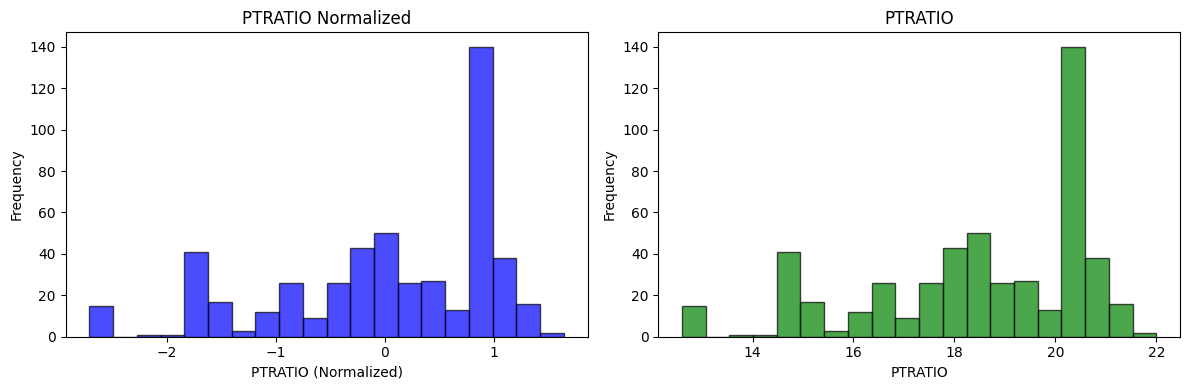

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df_boston['PTRATIO_normalized'], bins=20, color='blue', edgecolor='black', alpha=0.7)
axs[0].set_title('PTRATIO Normalized')
axs[0].set_xlabel('PTRATIO (Normalized)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_boston['PTRATIO'], bins=20, color='green', edgecolor='black', alpha=0.7)
axs[1].set_title('PTRATIO')
axs[1].set_xlabel('PTRATIO')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()